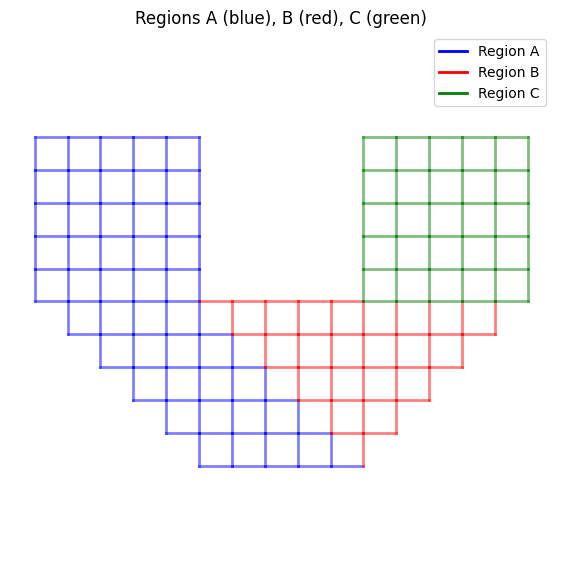

plaquettes in region ABC: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (5, 1), (5, 2), (5, 3), (5, 4), (6, 2), (6, 3), (6, 4), (7, 3), (7, 4), (8, 4), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (5, 10), (5, 11), (5, 12), (5, 13), (6, 10), (6, 11), (6, 12), (7, 10), (7, 11), (8, 10), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]
plaquettes in region AB: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 3), 

In [23]:
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import random
import math
from itertools import chain
import string

def get_edges(n):
    '''
    left-top corner is (0, 0)
    The plaquette is made of two side rectangles (2n * n) and one middle square (n*n) with boundary removed except for the top boundary.
    '''
    edges = []    
    # Horizontal edges for the top-left and top-right block
    for r in range(n):
        for c in range(n):
            edge1 = ((r, c), 'H')
            edge2 = ((r, c+2*n), 'H')
            edges.append(edge1)
            edges.append(edge2)
            
    # Vertical edges for the top-left and top-right block
    for r in range(n):
        for c in range(n+1):
            edge1 = ((r, c), 'V')
            edges.append(edge1)
    for r in range(n):
        for c in range(n+1):
            edge2 = ((r, c+2*n), 'V')
            edges.append(edge2)
    # left-bottom corner
    for r in range (n):
        for c in range(n-r-1, -1, -1):
            edge = ((n+r, r+c), 'H')
            edges.append(edge)
            
    for r in range (n):
        for c in range(n-r):
            edge = ((n+r, n-c), 'V')
            edges.append(edge)
    # right-bottom corner
    for r in range (n):
        for c in range(n-r, 0, -1):
            edge = ((n+r, 3*n-(r+c)), 'H')
            edges.append(edge)
    for r in range (n):
        for c in range(n-r):
            edge = ((n+r, 2*n+c), 'V')
            edges.append(edge)
    
    # Vertical edges for the left for the middle square
    for i in range(n):
        edge = ((n+i, n), 'V')
        edges.append(edge)
    # Horizontal edges for the middle square
    for r in range(n+1):
        for c in range(n):
            edge = ((r+n, c+n), 'H')
            edges.append(edge)    
            
    # Vertical edges for the middle square
    for r in range(n):
        for c in range(n-1):
            edge = ((r+n, c+n+1), 'V')
            edges.append(edge)
    return edges


def edges_of_plaquette(r, c):
    """
    Return the 4 canonical edges of the plaquette with top-left corner (r,c).
    """
    return [((r, c), 'H'), ((r+1, c), 'H'), ((r, c), 'V'), ((r, c+1), 'V')]

def region_plaquettes(regionEdges, all_plaq):
    """
    For a given set of allowed edges (regionE
    dges), return the list of plaquettes
    (by their top-left coordinate) that are partially contained in the region.
    """
    plaq = []
    for (r, c) in all_plaq:
        edges = [((r, c), 'H'),
                 ((r+1, c), 'H'),
                 ((r, c), 'V'),
                 ((r, c+1), 'V')]
        if all(e in regionEdges for e in edges):
            plaq.append((r, c))
    return plaq

def define_B_and_C(n):
    all_edges = set(get_edges(n))  
    setC = set()
    for r in range(n):
        for c in range(n):
            for e in edges_of_plaquette(r, c+2*n):
                if e not in setC:
                    setC.add(e)
    C_vertex_boundary = [(n, 2*n + i) for i in range(n+1)] 
    
    def left_below_edges(r, c):
        res = []
        if r > 0: res.append(((r, c-1), 'H'))
        res.append(((r, c), 'V'))
        return res

    setB = set()
    # Extending the grid distance by n steps.
    for i in range(n):
        for (r, c) in C_vertex_boundary:
            for e in left_below_edges(r, c):
                if e not in setB and e not in setC:
                    setB.add(e)
        new_boundary = []
        for (r, c) in C_vertex_boundary:
            new_boundary.append((r+1, c))
        for (r, c) in C_vertex_boundary:
            if (r, c-1) not in C_vertex_boundary:
                new_boundary.append((r, c-1))
        C_vertex_boundary = new_boundary
    
    setA = all_edges - setB - setC
    
    return setA, setB, setC

# ----- Plotting Regions A, B, and C -----

def plot_regions(n):
    """
    Plot the lattice showing regions A, B, and C in different colors.
    Region A: edges in A (blue)
    Region B: edges in B (red)
    Region C: edges in C (green)
    """
    allEdges = set(get_edges(n))
    setA, setB, setC = define_B_and_C(n)
    # Ensure each region only contains allowed edges.
    setA = setA.intersection(allEdges)
    setB = setB.intersection(allEdges)
    setC = setC.intersection(allEdges)
    plt.figure(figsize=(7, 7))
    
    # Plot all edges in A (blue)
    for edge in setA:
        (r, c), typ = edge
        if typ == 'H':
            x1, y1 = c, r
            x2, y2 = c+1, r
        else:
            x1, y1 = c, r
            x2, y2 = c, r+1
        plt.plot([x1, x2], [y1, y2], color='blue', lw=2, alpha = 0.5)
    
    # Plot all edges in B (red)
    for edge in setB:
        (r, c), typ = edge
        if typ == 'H':
            x1, y1 = c, r
            x2, y2 = c+1, r
        else:
            x1, y1 = c, r
            x2, y2 = c, r+1
        plt.plot([x1, x2], [y1, y2], color='red', lw=2, alpha = 0.5)
    
    # Plot all edges in C (green)
    for edge in setC:
        (r, c), typ = edge
        if typ == 'H':
            x1, y1 = c, r
            x2, y2 = c+1, r
        else:
            x1, y1 = c, r
            x2, y2 = c, r+1
        plt.plot([x1, x2], [y1, y2], color='green', lw=2, alpha = 0.5)
    
    # Add a legend manually.
    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], color='blue', lw=2, label='Region A'),
                       Line2D([0], [0], color='red', lw=2, label='Region B'),
                       Line2D([0], [0], color='green', lw=2, label='Region C')]
    plt.legend(handles=legend_elements, loc='upper right')
    
    plt.title("Regions A (blue), B (red), C (green)")
    plt.xlim(-0.5, n+0.5)
    plt.ylim(-0.5, n+0.5)
    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.axis('off')
    plt.show()

    return setA, setB, setC
n = 5
setA, setB, setC = plot_regions(n)
all_plaq = list(chain(
    ((r, c) for r in range(n) for c in range(n)),
    ((n + r, r+c) for r in range(n) for c in range(n-r)),
    ((r, c + 2*n) for r in range(n) for c in range(n)),
    ((n + r, 2*n + c) for r in range(n) for c in range(n-r)),  
    ((r, c + n) for r in range(n, 2*n) for c in range(n))
))

# Define regions:
region_ABC = get_edges(n)                 # Entire allowed lattice
region_AB  = setA.union(setB)
region_BC  = setB.union(setC)
region_B   = setB
region_C = setC
# For each region, get the list of plaquettes that are fully contained in it.
plaq_ABC = region_plaquettes(region_ABC, all_plaq)
plaq_AB  = region_plaquettes(region_AB, all_plaq)
plaq_BC  = region_plaquettes(region_BC, all_plaq)
plaq_B   = region_plaquettes(region_B, all_plaq)
plaq_C = region_plaquettes(region_C, all_plaq)
# Remove the top edges at the domain wall since there shouldn't be any excitation.
for c in range(n):
    setA.remove(((0, c), 'H'))
    setC.remove(((0, 2*n+c), 'H'))
print("plaquettes in region ABC:", plaq_ABC)
print("plaquettes in region AB:", plaq_AB)
print("plaquettes in region BC:", plaq_BC)
print("plaquettes in region B:", plaq_B)
print("setA:", setA)
print("setB:", setB)
print("setC:", setC)


In [ ]:
# Domain wall can't have excitations since it will exite the plaquette on the top of the domain wall

#Generate a anyon configuration
def generate_initial_config(plaquettes):
    """
    Generate the initial configuration: a dictionary for all edges (not in D) set to 0 (inactive).
    """
    config = {}
    for m in plaquettes:
        config[m] = 0
    return config


def sample_step(config, all_plaqs, prob_config):
    plaq = random.choice(all_plaqs)
    new_config = config.copy()
    new_config[plaq] = 1 - config[plaq]
    prob_new = region_weight(new_config, plaq, prob_config)
    
    if min(prob_new/prob_config, 1) > random.random():
        return new_config
    else:
        return config


def sample_configurations(all_edges, num_samples):
    """
    Uniform sampling to get the configurations.
    
    Args:
      num_samples: Number of configurations to sample.
    
    Returns:
      A list of configuration dictionaries.
    """
    samples = []
    config = generate_initial_config(all_edges)
    
    for _ in range(num_samples):
        sample_step(config, all_edges)
        samples.append(config.copy())
    return samples


def region_plaquettes(regionEdges, all_plaq):
    """
    For a given set of allowed edges (regionE
    dges), return the list of plaquettes
    (by their top-left coordinate) that are partially contained in the region.
    """
    plaq = []
    for (r, c) in all_plaq:
        if r != 0:
            edges = [((r, c), 'H'),
                 ((r+1, c), 'H'),
                 ((r, c), 'V'),
                 ((r, c+1), 'V')]
        else:
            edges = [((r, c), 'V'),
                 ((r+1, c), 'H'),
                 ((r, c), 'V')]
        if all(e in regionEdges for e in edges):
            plaq.append((r, c))
    
    return plaq

def region_weight(config, regionPlaquettes, p):
    """
    For a given configuration and region:
      - Count the number of excitations in the plaquettes inside the region.
      - Return the weight (1-2p)^(2 * (# excitations)).
    """
    # Check for active edge outside the region.

    num_excited = 0
    for (r, c) in regionPlaquettes:
        edges = [((r, c), 'H'), ((r+1, c), 'H'), ((r, c), 'V'), ((r, c+1), 'V')]
        count = sum(config.get(e, 0) for e in edges)
        if count % 2 == 1:
            num_excited += 1
    if num_excited == 0:
        return 1
    else:
        return (1-2*p) ** (2 * num_excited)

In [15]:
import jax.numpy as jnp
from functools import partial
def T_tensor(p):
    """
    Constructs the two-leg tensor that represents the weight on each edge.
    
    T_{s1 s2} = delta(s1,s2) * (p**s1)*((1-p)**(1-s1))
    It is a 2x2 diagonal matrix.
    """
    return jnp.array([[1-p, 0], [0, p]])

def boundary_T_tensor(p):
    return jnp.array([1-p, p])

def Q_tensor(m):
    """
    Constructs the four-leg tensor for a plaquette that enforces the parity.
    
    Q^m_{s1 s2 s3 s4} = 1 if (s1 + s2 + s3 + s4) mod 2 equals m, else 0.
    The tensor has shape (2,2,2,2).
    
    m should be 0 or 1.
    """
    Q = jnp.zeros((2, 2, 2, 2))
    # Loop over all 16 combinations of {s1, s2, s3, s4}.
    for s1 in (0, 1):
        for s2 in (0, 1):
            for s3 in (0, 1):
                for s4 in (0, 1):
                    parity = (s1 + s2 + s3 + s4) % 2
                    # If parity matches the anyon measurement, set entry to 1.
                    value = 1 if parity == m else 0
                    Q = Q.at[s1, s2, s3, s4].set(value)
    return Q

def incomplete_Q_tensor(m):

    Q = jnp.zeros((2, 2, 2))
    # Loop over all 16 combinations of {s1, s2, s3, s4}.
    for s1 in (0, 1):
        for s2 in (0, 1):
            for s3 in (0, 1):
                parity = (s1 + s2 + s3 ) % 2
                # If parity matches the anyon measurement, set entry to 1.
                value = 1 if parity == m else 0
                Q = Q.at[s1, s2, s3].set(value)
    return Q

def conrer_Q_tensor(m):
    Q = jnp.zeros((2, 2))
    # Loop over all 16 combinations of {s1, s2, s3, s4}.
    for s1 in (0, 1):
        for s2 in (0, 1):
            parity = (s1 + s2 ) % 2
            # If parity matches the anyon measurement, set entry to 1.
            value = 1 if parity == m else 0
            Q = Q.at[s1, s2].set(value)
    return Q

In [ ]:
def initial_contraction_top(n, p, m):
    """
    Build a list of n tensors corresponding to the top row.
    The leftmost and rightmost are boundary incomplete (shape (2,2)),
    while the ones in between are boundary full (shape (2,2,2)).
    """
    tensor_list = []
    tensor_list.append(boundary_T_tensor(p))
    for _ in range(n-1):
        tensor_list.append(incomplete_Q_tensor(m))  
        tensor_list.append(T_tensor(p))
    tensor_list.append(incomplete_Q_tensor(m))  
    tensor_list.append(boundary_T_tensor(p))
    return tensor_list

# top-bottom T-tensor
def initial_contraction_bulk_T(n, p):
    tensor_list = []
    for i in range(n):
        tensor_list.append(T_tensor(p))
    return tensor_list

#Middle-bulk contraction
def initial_contraction_bulk(n, p, m):

    tensor_list = []
    for _ in range(n - 1):
        tensor_list.append([T_tensor(p), Q_tensor(m)])  
    tensor_list.append(boundary_T_tensor(p))  
    
    return tensor_list


# 3. Contracting the top-boundary tensors via a custom einsum

@partial(jax.jit, static_argnums=(0,))
def contract_top_boundary(n, p):
    """
    Contract a list of n top-boundary tensors from left to right.
    The free vertical indices remain, and internal (horizontal) indices are contracted.
    """
    # Define labels for the indices.
    top_label = string.ascii_letters[: n]
    virtual_label = string.ascii_letters[n : 2 * n + 1]
    bottom_label = string.ascii_letters[2 * n + 1 : 3 * n]
 
    # Initialize the tensor list.
    tensor_list = initial_contraction_top(n, p)

    einsum_terms = []
    # Left boundary tensor: shape (2,) → assign indices: [virtual_label[0]]
    einsum_terms.append(virtual_label[0])

    # Middle tensors (i = 2,..., n-1): shape (2,2,2)
    for i in range(n-1):
        term = virtual_label[2*i] + bottom_label[i] + virtual_label[2*i+1]
        einsum_terms.append(term)
        term = virtual_label[2*i+1] + virtual_label[2*i + 2]
        einsum_terms.append(term)

    # Right boundary
    einsum_terms.append(virtual_label[2 * (n - 1)], bottom_label[n - 1], virtual_label[2 * (n - 1) + 1])
    einsum_terms.append(virtual_label[2 * (n - 1) + 1])

    # The output indices are given by the vertical bonds.
    output_subscript = "".join(bottom_label[i] for i in range(n))
    einsum_str = ",".join(einsum_terms) + "->" + output_subscript
    # Perform the contraction (without optimize=True, since JAX does not support it)
    result = jnp.einsum(einsum_str, *tensor_list)
    return result

@partial(jax.jit, static_argnums=(0,))
def contract_T(n, p, top_tensor):
    top_label = string.ascii_letters[: n]
    virtual_label = string.ascii_letters[n : 2 * n + 1]
    bottom_label = string.ascii_letters[2 * n + 1 : 3 * n]
 
    tensor_list = []
    # Start with the top_tensor.
    tensor_list.append(top_tensor)
    # Append the bulk tensors.
    T_tensors = initial_contraction_bulk_T(n, p)
    for tensor in T_tensors:
        tensor_list.append(tensor)
    einsum_terms = []
    # Top part: using the top indices from top_tensor.
    top_terms = "".join(top_label[i] for i in range(n))
    einsum_terms.append(top_terms)
    for i in range(n):
        einsum_terms.append(top_label[i] + bottom_label[i])
    # The output indices are chosen to be the bottom indices.
    output_subscript = "".join(bottom_label[i] for i in range(n))
    einsum_str = ",".join(einsum_terms) + "->" + output_subscript
    final_tensor = jnp.einsum(einsum_str, *tensor_list)
    return final_tensor

@partial(jax.jit, static_argnums=(0,))
def contract_bulk(n, p, top_tensor):
    """
    Contract the list of n bulk tensors with the top tensor from left to right.
    """
    def compute_bulk_scan(carry, x):
        """
        Carry is the big tensor during the contraction.
        x is the tuple of small tensor that we're going to contract with the carry.
        """
        top_tensor, i = carry
        T, Q = x
        term1 = virtual_label[2*i-1]+virtual_label[2*i]
        einsum_terms.append(term1)
        term2 = top_label[i]+virtual_label[2*i]+virtual_label[2*i+1]+bottom_label[i]
        einsum_terms.append(term2)
        output_subscript = bottom_label[:i+1]+virtual_label[2*i+1]+top_label[i+1:]
        einsum_str_bulk = ",".join(einsum_terms) + "->" + output_subscript
        final_tensor = jnp.einsum(einsum_str_bulk, carry, Q, T)
        return (final_tensor, i+1), x
    
    top_label = string.ascii_letters[:n]
    virtual_label = string.ascii_letters[n:2 * n + 1]
    bottom_label = string.ascii_letters[2 * n + 1:3 * n +1]

    # Append the bulk tensors.
    bulk_tensors = initial_contraction_bulk(n, p)
    
    einsum_terms = []
    # Top part: using the top indices from top_tensor.
    top_terms = "".join(top_label[i] for i in range(n))
    einsum_terms.append(top_terms)
    # Single leg for the left boundary 
    einsum_terms.append(virtual_label[0])
    # Bulk part for the left boundary
    einsum_terms.append(top_label[0] + virtual_label[0] + virtual_label[1] + bottom_label[0])
    output_subscript = bottom_label[0] + virtual_label[1] + "".join(top_label[i] for i in range(1, n))
    input_tensor = jnp.einsum(",".join(einsum_terms) + "->" + output_subscript, top_tensor, conrer_Q_tensor(p), T_tensor(p))
    
    # Middle bulk tensors.
    top_tensor, _ = lax.scan(compute_bulk_scan, input_tensor, bulk_tensors)
        
    # Right boundary bulk tensor.
    einsum_terms.append(top_label[n - 1] + virtual_label[n - 2] + bottom_label[n - 1])

    # The output indices are chosen to be the bottom indices.
    output_subscript = "".join(bottom_label[i] for i in range(n))
    einsum_str_bulk = ",".join(einsum_terms) + "->" + output_subscript
    final_tensor = jnp.einsum(einsum_str_bulk, top_tensor, T_tensor(p))
    
    return final_tensor

@partial(jax.jit, static_argnums=(0,))
def contract_ladder_T(n, p, initial_tensor):
    

@partial(jax.jit, static_argnums=(0,))
def contract_ladder(n, p, initial_tensor):
    """
    Perform a ladder contraction over n tensors.
    """
    top_label = string.ascii_letters[:n]
    virtual_label = string.ascii_letters[n:2 * n + 1]
    bottom_label = string.ascii_letters[2 * n + 1:3 * n]

    tensor = initial_tensor
    for i in range(n - 1):
        tensor_list = []
        einsum_terms = []
        # Append current top tensor.
        tensor_list.append(tensor)
        term = "".join(top_label[k] for k in range(n - i)) + "".join(virtual_label[k] for k in range(i))
        einsum_terms.append(term)

        # Append the corner tensor.
        corner = corner_tensor(p)
        tensor_list.append(corner)
        einsum_terms.append(top_label[0] + virtual_label[i])
        for j in range(n - i - 1):
            tensor_list.append(full_tensor(p))
            einsum_terms.append(virtual_label[i + j] + top_label[j + 1] + virtual_label[i + j + 1] + bottom_label[j])
        output_subscript = "".join(virtual_label[k] for k in range(i)) + "".join(
            bottom_label[k] for k in range(n - i - 1)) + virtual_label[i]
        einsum_str = ",".join(einsum_terms) + "->" + output_subscript
        tensor = jnp.einsum(einsum_str, *tensor_list)
    # Final contraction step.
    tensor_list = []
    einsum_terms = []

    tensor_list.append(tensor)
    einsum_terms.append("".join(top_label[k] for k in range(n - 1)) + virtual_label[n - 1])

    corner = corner_tensor(p)
    tensor_list.append(corner)
    einsum_terms.append(virtual_label[n - 1] + top_label[n - 1])
    output_subscript = "".join(top_label[k] for k in range(n))
    tensor = jnp.einsum(",".join(einsum_terms) + "->" + output_subscript, *tensor_list)

    return tensor


In [ ]:
import jax
import jax.numpy as jnp
from jax import lax
from functools import partial
import string # Keep for potential use, though scan avoids explicit long strings

# Original Tensor Definitions (keeping them as provided)
# Ensure they output float types for JAX operations
def T_tensor(p):
    return jnp.array([[1-p, 0], [0, p]])

def boundary_T_tensor(p):
    # Corresponds to vertical boundary edges or MPO boundary vectors. Rank-1.
    return jnp.array([1-p, p])

def Q_tensor(m):
    Q = jnp.zeros((2, 2, 2, 2), dtype=jnp.float32) # Use float for contractions
    for s1 in (0, 1):
        for s2 in (0, 1):
            for s3 in (0, 1):
                for s4 in (0, 1):
                    parity = (s1 + s2 + s3 + s4) % 2
                    if parity == m:
                        Q = Q.at[s1, s2, s3, s4].set(1.0)
    return Q

# Helper to get tensor from stack safely inside scan body
# Using lax.dynamic_slice_in_dim is JAX-idiomatic for scan loops.
def get_tensor(stacked_tensor, index):
    # Assumes stacked_tensor has shape (num_items, ...)
    return lax.dynamic_slice_in_dim(stacked_tensor, index, 1, axis=0)[0]

# Scan body function for contract_bulk_scan
@partial(jax.jit, static_argnums=(0,)) # jit the scan body
def _contract_bulk_scan_body(n, carry, x, stacked_Qs, stacked_hTs, T_right):
    """
    Performs one step of the MPO-MPS contraction scan.

    Args:
        n: Grid width (static).
        carry: The left boundary tensor L_{i-1} from previous step.
               Shape (bond_dim,) -> (2,), index 'vp' (virtual previous).
        x: Tuple (i, top_leg_i). 'i' is the current column index (0 to n-1).
           'top_leg_i' is the tensor for the top physical leg at site i.
           Shape (phys_dim,) -> (2,), index 't'.
        stacked_Qs: Stacked Q tensors (n, 2, 2, 2, 2).
                    Indices: top(t), v_prev(vp), v_curr(vc), bottom(b).
        stacked_hTs: Stacked horizontal T tensors (n-1, 2, 2).
                     Indices: v_curr(vc), v_next(vn).
        T_right: Right boundary T tensor (rank-1). Index: v_curr(vc).

    Returns:
        (L_next, None): Updated carry L_i (or final result) and no per-step output.
    """
    i, top_leg = x
    L_prev = carry # Shape (2,), index 'vp'

    # Get the Q tensor for this column
    Q = get_tensor(stacked_Qs, i) # Shape (2, 2, 2, 2), indices t, vp, vc, b

    # Contract L_prev, Q, top_leg -> intermediate tensor Output_b
    # Output_b indices: v_curr(vc), bottom(b) -> shape (2, 2)
    # einsum: 'vp, tvpcb, t -> vcb'
    Output_b = jnp.einsum('vp, tvpcb, t -> vcb', L_prev, Q, top_leg,
                         precision=lax.Precision.HIGHEST)

    # --- Compute L_next conditionally based on step index i ---
    def compute_L_next_bulk(op_b):
        # This path is taken for i = 0 to n-2
        # op_b = Output_b, indices (vc, b)
        # Get horizontal T connecting Q_i and Q_{i+1}
        hT = get_tensor(stacked_hTs, i) # hT indices: v_curr(vc), v_next(vn) -> (2, 2)
        # Contract Output_b with hT, sum over vc and b -> L_next index vn
        # einsum: 'vcb, vcvn -> vn'
        L_next = jnp.einsum('vcb, vcvn -> vn', op_b, hT)
        return L_next # Shape (2,), index 'vn'

    def compute_L_next_final(op_b):
        # This path is taken for the last step i = n-1
        # op_b = Output_b, indices (vc, b)
        # Contract with right boundary T_right, sum over vc -> Final result index b
        # T_right index: v_curr(vc) -> (2,)
        # einsum: 'vcb, vc -> b'
        # This result represents the final tensor projection onto the last bottom leg 'b'.
        # If the overall contraction result is expected to be scalar,
        # a final summation/contraction might be needed depending on boundaries.
        L_final = jnp.einsum('vcb, vc -> b', op_b, T_right,
                            precision=lax.Precision.HIGHEST)
        return L_final # Shape (2,), index 'b'

    # Use lax.cond to choose the correct contraction path
    L_next = lax.cond(
        i < n - 1,
        compute_L_next_bulk,    # Pass function for bulk steps
        compute_L_next_final,   # Pass function for final step
        operand=Output_b        # The input to the selected function
    )

    # Return the next carry state (L_next) and no per-step output
    return L_next, None

# Main function using lax.scan for bulk contraction
@partial(jax.jit, static_argnums=(0,)) # jit the main scan function
def contract_bulk_scan(n, p, m, top_tensor_legs):
    """
    Contracts a bulk row (MPO) with the tensor from the row above (MPS) using lax.scan.
    This implementation calculates the full contraction result projected onto the
    last bottom leg 'b' when using vector boundary conditions.

    Args:
        n: Grid width (static).
        p: Error probability.
        m: Plaquette parity measurement (0 or 1).
        top_tensor_legs: Preprocessed tensor legs from the row above.
                         *** CRITICAL: Expected shape is (n, 2) ***
                         Represents the stack of 'n' physical legs, each of size 2.
                         User must ensure `top_tensor` is converted to this format.

    Returns:
        Tensor representing the final contraction result. Shape (2,) if n > 0,
        corresponding to the index of the last bottom leg contracted with the
        right boundary. Returns scalar dot product if n=0.
    """
    if n < 0:
        raise ValueError("n must be non-negative")
    if n > 0 and top_tensor_legs.shape != (n, 2):
         raise ValueError(f"Expected top_tensor_legs shape ({n}, 2), got {top_tensor_legs.shape}")


    # --- Prepare tensors for scanning ---
    T_left = boundary_T_tensor(p)  # Left boundary vector (initial L state)
    T_right = boundary_T_tensor(p) # Right boundary vector

    # Stack Q tensors (n plaquettes)
    Q = Q_tensor(m)
    stacked_Qs = jnp.stack([Q] * n) # Shape (n, 2, 2, 2, 2)

    # Stack horizontal T tensors (n-1 connections between Qs)
    hT = T_tensor(p)
    if n > 1:
         # Shape (n-1, 2, 2)
         stacked_hTs = jnp.stack([hT] * (n-1))
    else:
         # Handle n=1 case: No horizontal T's needed. Pass dummy array.
         # The scan body logic (i < n-1) handles this.
         stacked_hTs = jnp.zeros((0, 2, 2), dtype=jnp.float32) # Empty stack


    # Prepare sequence for scan: (indices, top_legs)
    xs = (jnp.arange(n), top_tensor_legs) # Use the preprocessed top legs

    # Define the scan body with necessary arguments partially filled
    scan_body_partial = partial(_contract_bulk_scan_body, n,
                                stacked_Qs=stacked_Qs,
                                stacked_hTs=stacked_hTs,
                                T_right=T_right)

    # Initial state for the scan carry
    init_carry = T_left # Shape (2,)

    # Run the scan only if n > 0
    if n > 0:
        final_carry, _ = lax.scan(scan_body_partial, init_carry, xs)
        result = final_carry # Shape (2,)
    else: # Handle n=0 case
        # Contract left and right boundaries directly. Result is scalar.
        result = jnp.dot(T_left, T_right)

    return result

# --- Example Usage ---
# Note: Requires a *correctly preprocessed* top_tensor_legs array.

n_example = 4
p_example = 0.1
m_example = 0

# Create a placeholder for top_tensor_legs with the required shape (n, 2)
# This typically comes from the previous row's contraction result (e.g., an MPS)
# Example: Product state |00...0>
top_tensor_legs_example = jnp.array([[1.0, 0.0]] * n_example, dtype=jnp.float32)
# Example: Product state |++...+> (equal superposition)
# top_tensor_legs_example = jnp.array([[1.0/jnp.sqrt(2), 1.0/jnp.sqrt(2)]] * n_example, dtype=jnp.float32)

print(f"Running bulk contraction scan for n={n_example}")
final_vector = contract_bulk_scan(n_example, p_example, m_example, top_tensor_legs_example)
print("Result shape:", final_vector.shape)
print("Result vector:", final_vector)

# Example for n=1
print("\nRunning bulk contraction scan for n=1")
top_legs_n1 = jnp.array([[1.0, 0.0]], dtype=jnp.float32)
final_vector_n1 = contract_bulk_scan(1, p_example, m_example, top_legs_n1)
print("Result shape (n=1):", final_vector_n1.shape)
print("Result vector (n=1):", final_vector_n1)

# Example for n=0
print("\nRunning bulk contraction scan for n=0")
top_legs_n0 = jnp.zeros((0, 2), dtype=jnp.float32) # Empty correct shape
final_scalar_n0 = contract_bulk_scan(0, p_example, m_example, top_legs_n0)
print("Result shape (n=0):", final_scalar_n0.shape)
print("Result scalar (n=0):", final_scalar_n0)


# --- Optional: Scan for Top Boundary ---
# The top boundary contraction produces the initial state tensor (rank n).
# This typically requires a scan with a growing carry state shape, which JAX
# can handle but might be less performant than fixed-shape scans.

@partial(jax.jit, static_argnums=(0,))
def _contract_top_scan_body(n, carry, x):
    """Scan body for top boundary. Carry grows in rank."""
    k, tensor_k = x # k = step index 0..2n-2
    # k=0: carry=L(v0), tensor=iQ0(v0,b0,v1). Output(b0,v1)
    # k=1: carry=Prev(b0,v1), tensor=T1(v1,v2). Output(b0,v2)
    # k=2: carry=Prev(b0,v2), tensor=iQ1(v2,b1,v3). Output(b0,b1,v3)
    # ...
    is_iQ_step = (k % 2 == 0)

    if k == 0: # First step: Contract initial boundary T with first iQ
        L = carry      # index v0, shape (2,)
        iQ0 = tensor_k # indices v0, b0, v1, shape (2, 2, 2)
        # einsum: v,vbl->bl
        next_carry = jnp.einsum('v,vbl->bl', L, iQ0, precision=lax.Precision.HIGHEST)
    elif is_iQ_step: # Contracting with iQ_k: Contract last axis(v_prev) with first axis(v_prev)
        prev_carry = carry # indices b0...b(k/2-1), v_prev
        iQ_k = tensor_k    # indices v_prev, b(k/2), v_next
        # Use tensordot for cleaner index handling than einsum strings
        next_carry = jnp.tensordot(prev_carry, iQ_k, axes=([-1], [0]))
        # Result indices: b0...b(k/2-1), b(k/2), v_next
    else: # Contracting with T_k: Contract last axis(v_prev) with first axis(v_prev)
        prev_carry = carry # indices b0...b((k-1)/2), v_prev
        T_k = tensor_k     # indices v_prev, v_next
        next_carry = jnp.tensordot(prev_carry, T_k, axes=([-1], [0]))
        # Result indices: b0..b((k-1)/2), v_next

    return next_carry, None

# Need incomplete_Q_tensor definition
def incomplete_Q_tensor(m):
    Q = jnp.zeros((2, 2, 2), dtype=jnp.float32)
    for s1 in (0, 1):
        for s2 in (0, 1):
            for s3 in (0, 1):
                parity = (s1 + s2 + s3 ) % 2
                if parity == m:
                    Q = Q.at[s1, s2, s3].set(1.0)
    return Q

@partial(jax.jit, static_argnums=(0,))
def contract_top_boundary_scan(n, p, m):
    """Contracts the top boundary tensors using lax.scan with growing state."""
    if n <= 0: return jnp.array(1.0, dtype=jnp.float32) # Scalar for n=0

    # Define boundary and bulk tensors for the top row structure
    T_left = boundary_T_tensor(p)
    T_right = boundary_T_tensor(p)
    iQ = incomplete_Q_tensor(m) # Shape (2, 2, 2) for boundary Q
    T = T_tensor(p)             # Shape (2, 2) for horizontal T

    if n == 1:
        # Special case n=1: T_left, iQ, T_right
        # einsum v0, v0 b0 v1, v1 -> b0
        return jnp.einsum('v,vbl,l->b', T_left, iQ, T_right, precision=lax.Precision.HIGHEST)

    # Build the list of tensors for the scan steps (k=0 to 2n-2)
    # Sequence: iQ0, T1, iQ1, T2, ..., T(n-1), iQ(n-1)
    tensors_for_scan = []
    tensors_for_scan.append(iQ) # k=0
    for _ in range(n - 1):
        tensors_for_scan.append(T)  # k = 1, 3, ...
        tensors_for_scan.append(iQ) # k = 2, 4, ...
    # Length is 1 + 2*(n-1) = 2n-1

    # Prepare sequence for scan (indices, list_of_tensors)
    # Note: Passing list of tensors directly might hinder JIT. Stacking if possible is better.
    # However, tensors have different ranks here (iQ rank 3, T rank 2). Stacking not direct.
    # JAX scan can handle list/tuple pytrees in xs.
    xs = (jnp.arange(2 * n - 1), tensors_for_scan)

    scan_body_partial = partial(_contract_top_scan_body, n)

    # Run the scan. Initial carry is the left boundary T.
    final_carry, _ = lax.scan(scan_body_partial, T_left, xs)
    # final_carry has shape (b0...b(n-1), v_last) where v_last=v[2n-1]

    # Final contraction with T_right to close the last virtual index
    # einsum b0... v, v -> b0...
    result_tensor = jnp.tensordot(final_carry, T_right, axes=([-1], [0]))
    # Result shape (b0...b(n-1)) = (2,)*n

    return result_tensor

print("\nRunning top boundary scan for n=3")
top_tensor_from_scan = contract_top_boundary_scan(3, p_example, m_example)
print("Result shape:", top_tensor_from_scan.shape)
# print("Result tensor:", top_tensor_from_scan) # Can be large

# Now you could potentially preprocess top_tensor_from_scan to feed into contract_bulk_scan
# This preprocessing step is non-trivial for general MPS.
# Example: If you only need the legs for a product state calculation:
# preprocess = lambda tensor: jnp.stack([tensor[i] for i in range(n)]) # Incorrect!
# A simple (likely physically incorrect) placeholder for testing shape compatibility:
if n_example == 3:
    placeholder_legs = jnp.ones((n_example, 2), dtype=jnp.float32) * 0.5 # Dummy data
    print("\nRunning bulk scan with placeholder legs derived from top scan (n=3)")
    bulk_result = contract_bulk_scan(n_example, p_example, m_example, placeholder_legs)
    print("Result shape:", bulk_result.shape)
    print("Result vector:", bulk_result)

In [16]:
jnp.array([[1.0, 0.0]] * 4, dtype=jnp.float32)

Array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)